# 一、熟悉机器学习流程

In [3]:
#1：
# T为了同时支持python 2 和python 3
from __future__ import division, print_function, unicode_literals

# 导入库
import numpy as np
import os #os 模块提供了许多与操作系统交互的功能，比如文件和目录的操作、环境变量的访问、进程管理等

# to make this notebook's output stable across runs
np.random.seed(42)
'''np.random.seed(42)是 NumPy 库中用于生成伪随机数的函数调用。具体来说，它设置了随机数生成器的种子(seed)为42，
以确保在每次运行代码时生成的随机数序列都是相同的。
这种行为对于需要可重复性的实验或者结果验证是非常有用的。通过设置种子，可以确保在相同的条件下，
每次运行程序都会生成相同的随机数序列，从而使得结果可以被复现。'''
# To plot pretty figures
%matplotlib inline
'''%matplotlib inline 命令会可以直接在 Notebook 中查看绘图结果，而无需额外的窗口管理。。'''
import matplotlib as mpl #matplotlib 是一个 Python 库，用于绘制数据可视化图表
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)#设置了轴标签（axes labels）的字体大小为14
mpl.rc('xtick', labelsize=12)#x 轴刻度标签的字体大小为12
mpl.rc('ytick', labelsize=12)#y 轴刻度标签的字体大小为12

plt.rcParams['font.sans-serif'] = 'SimHei'#宋体，显示中文
plt.rcParams['axes.unicode_minus'] = False
#负号可能显示异常。通过将 plt.rcParams['axes.unicode_minus'] 设置为 False，可以使用不同的机制来绘制负号，以解决这种显示问题。
# 设置保存路径
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


## 1、读取数据

In [4]:
import pandas as pd
datapath = os.path.join ("datasets", "lifesat","")
oecd_bli = pd.read_csv(datapath+ "oecd_bli_2015.csv",thousands=',')#读取生活满意度表的oecd_bli_2015文件
gdp_per_capita = pd.read_csv(datapath+ "gdp_per_capita.csv",encoding = 'latin1', 
                             delimiter = '\t', na_values = 'n/a', thousands = ',')#读取人均GDP的gdp_per_capita文件
display(oecd_bli,gdp_per_capita)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.10,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.00,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.00,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.20,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.90,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3287,EST,Estonia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.43,NaN,NaN
3288,ISR,Israel,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.24,E,Estimated value
3289,RUS,Russia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.75,E,Estimated value
3290,SVN,Slovenia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.12,NaN,NaN


,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0
...,...,...,...,...,...,...,...
185,Vietnam,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",2088.344,2012.0
186,Yemen,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1302.940,2008.0
187,Zambia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1350.151,2010.0
188,Zimbabwe,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1064.350,2012.0


## 2、数据处理

In [5]:
#观察表格，生活满意度在oecd_bli_2015.csv文件中，GDP在gdp_per_capita.csv文件中
#(1) 处理文件oecd_bli_2015.csv：找到INEQUALITY == 'TOT'——>找不同国家的Indicator的值——>重命名Life satisfaction为生活满意度
oecd_bli = oecd_bli[oecd_bli['INEQUALITY'] == 'TOT']
oecd_bli = oecd_bli.pivot(index = 'Country', columns = 'Indicator', values = 'Value')
oecd_bli.rename(columns = {'Life satisfaction':'生活满意度'}, inplace = True)
#（2） 处理文件gdp_per_capita.csv，把国家作为行索引——>重命名2015为GDP
gdp_per_capita.set_index('Country',inplace = True)
gdp_per_capita.rename(columns={'2015':'人均GDP'},inplace=True)
# (3) 按照国家为行索引合并两个csv文件，只保留生活满意度、GDP
full_country_stats = pd.merge(left = gdp_per_capita['人均GDP'],right = oecd_bli['生活满意度'],left_index=True,right_index=True)
# (4) 按照GDP排序各个国家
full_country_stats.sort_values(by = '人均GDP',inplace = True)
#（5）为了教学效果，这里我们先拿出去几个数据
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["人均GDP", '生活满意度']].iloc[keep_indices]
missing_data = full_country_stats[["人均GDP", '生活满意度']].iloc[remove_indices]
sample_data

,人均GDP,生活满意度
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


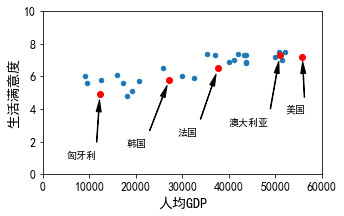

In [6]:
#(6) 观察数据
#2：
sample_data.plot(kind='scatter', x="人均GDP", y='生活满意度', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    if country == "United States":  country = "美国"
    if country == "Hungary": country = "匈牙利"
    if country == "Korea": country = "韩国" 
    if country == "France": country = "法国" 
    if country == "Australia": country = "澳大利亚" 
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
#save_fig('money_happy_scatterplot')
plt.show()


可以发现尽管数据有噪音，但似乎人们越有钱越幸福。
建模一个生活满意程度的线性模型 
$$生活满意度=\theta_0+\theta_1\times 人均GDP$$

接下来设置不同的参数，来画出不同的直线

Saving figure tweaking_model_params_plot


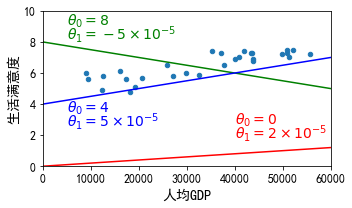

In [7]:
#（7）绘制不同参数下的曲线
#3：
import numpy as np

sample_data.plot(kind='scatter', x="人均GDP", y='生活满意度', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, 2*X/100000, "r")
plt.text(40000, 2.7, r"$\theta_0 = 0$", fontsize=14, color="r")
plt.text(40000, 1.8, r"$\theta_1 = 2 \times 10^{-5}$", fontsize=14, color="r")
plt.plot(X, 8 - 5*X/100000, "g")
plt.text(5000, 9.1, r"$\theta_0 = 8$", fontsize=14, color="g")
plt.text(5000, 8.2, r"$\theta_1 = -5 \times 10^{-5}$", fontsize=14, color="g")
plt.plot(X, 4 + 5*X/100000, "b")
plt.text(5000, 3.5, r"$\theta_0 = 4$", fontsize=14, color="b")
plt.text(5000, 2.6, r"$\theta_1 = 5 \times 10^{-5}$", fontsize=14, color="b")
save_fig('tweaking_model_params_plot')
plt.show()


人均GDP是数据的样子，生活满意度是数据的结果，直线就是数据的样子和数据结果的映射关系，
机器学习就是学习这条直线，
怎么学？就是算出直线对应的参数

## 3、模型构建——模型训练

In [8]:
from sklearn import linear_model
lin1 = linear_model.LinearRegression()#确定模型
Xsample = np.c_[sample_data["人均GDP"]]  #提取数据
ysample = np.c_[sample_data['生活满意度']]
lin1.fit(Xsample, ysample)             #训练模型
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0, t1

(4.853052800266436, 4.911544589158483e-05)

$\theta_0=4.85, \theta_1=4.91\times 10^{-5}$

Saving figure best_fit_model_plot


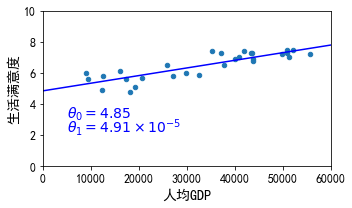

In [9]:
#4:
sample_data.plot(kind='scatter', x="人均GDP", y='生活满意度', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
save_fig('best_fit_model_plot')
plt.show()


学习出的模型为$\theta_0=4.85, \theta_1=4.91\times 10^{-5}$

## 4、模型评估/预测

训练好模型后，就可以运行模型进行评估或者预测了。例如，我们想知道中国人有多幸福，你可以查询中国在2015年的人均GDP，为7990美元，然后应用模型得到生活满意度，后者的值在$4.85+7990\times4.91\times10^{-5}=5.25$左右。

In [45]:
#把中国的GDP数据放进来，预测中国的满意度
China_predicted_life_satisfaction = lin1.predict([[7990]])[0][0]
China_predicted_life_satisfaction

5.245485212940198

Saving figure China_prediction_plot


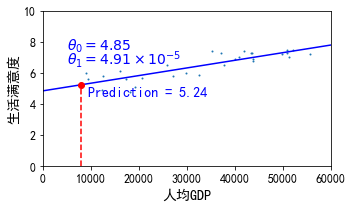

In [46]:
#5：
# 可视化
sample_data.plot(kind='scatter', x="人均GDP", y='生活满意度', figsize=(5,3), s=1)
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.axis([0, 60000, 0, 10])
plt.text(5000, 7.5, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 6.6, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.plot([7990, 7990], [0, China_predicted_life_satisfaction], "r--")
plt.text(9500, 4.5, r"Prediction = 5.24", fontsize=14, color="b")
plt.plot(7990, China_predicted_life_satisfaction, "ro")
save_fig('China_prediction_plot')
plt.show()


以上就是机器学习的主要流程，如果顺利，你的模型就可以作出好的预测。如果不能，你可能需要使用更多的属性（就业率、健康、空气污染等等），获取更多更好的训练数据，或选择一个更好的模型（比如，多项式回归模型）。

## 当然以上过程可以通过模块化方法进行

In [5]:
#6 数据处理
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    oecd_bli.rename(columns={'Life satisfaction':'生活满意度'}, inplace=True)
    gdp_per_capita.rename(columns={"2015": "人均GDP"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="人均GDP", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["人均GDP", '生活满意度']].iloc[keep_indices]

[[5.24548521]]


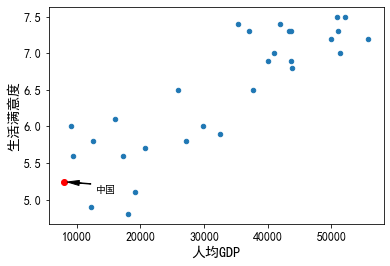

In [7]:
#7
# 导入库
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# 读取数据
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
# 数据预处理
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["人均GDP"]]
y = np.c_[country_stats["生活满意度"]]

# 观察数据
country_stats.plot(kind='scatter', x="人均GDP", y='生活满意度')

# 构建模型
model = sklearn.linear_model.LinearRegression()

# 训练模型
model.fit(X, y)

# 评估模型
X_new = [[7990]]  # China' GDP per capita
China_predicted_life_satisfaction = model.predict(X_new)
print(China_predicted_life_satisfaction) # outputs [[5.24548521]]
plt.plot(X_new, China_predicted_life_satisfaction, "ro")
plt.annotate('中国', xy=(7990,China_predicted_life_satisfaction), xytext=(13000,5.1),
             arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
plt.show()